In [1]:
import numpy as np
import pandas as pd
from stopsignalmetrics import StopData, SSRTmodel, PostStopSlow, Violations, StopSummary


import matplotlib.pyplot as plt
import seaborn as sns

# MTURK DATA

In [2]:
variable_dict = {
   "columns": {
      "ID": "worker_id",
      "block": "current_block",
      "condition": "SS_trial_type",
      "SSD": "SS_delay",
      "goRT": "rt",
      "stopRT": "rt",
      "response": "key_press",
      "correct_response": "correct_response",
      "choice_accuracy": "choice_accuracy"
   },
   "key_codes": {
      "go": "go",
      "stop": "stop",
      "correct": 1,
      "incorrect": 0,
      "noResponse": np.nan
   }
}
stop_data = StopData(var_dict=variable_dict)

# 1 Subject

In [3]:
subj_file = '../stopsignalmetrics/data/example_mturk_individual.csv'
subj_df = pd.read_csv(subj_file)
cleaned_subj = stop_data.fit_transform(subj_df)

In [4]:
ssrt_model = SSRTmodel(model='all')
metrics = ssrt_model.fit_transform(cleaned_subj)
metrics

{'SSRT': {'mean': 301.53228449688623,
  'integration': 279.6296296296296,
  'omission': 282.6296296296296,
  'replacement': 282.6296296296296},
 'mean_SSD': 295.3703703703704,
 'p_respond': 0.5,
 'max_RT': 1675.0,
 'mean_go_RT': 596.9026548672566,
 'mean_stopfail_RT': 520.8888888888889,
 'omission_count': 1,
 'omission_rate': 0.008771929824561403,
 'go_acc': 0.911504424778761,
 'stopfail_acc': 0.0}

# Group 1

In [5]:
group_file = '../stopsignalmetrics/data/example_mturk_group.csv'
group_df = pd.read_csv(group_file)

cleaned_group = stop_data.fit_transform(group_df)
cleaned_group

,SSD,SS_duration,SS_stimulus,condition,att_check_percent,block_duration,correct,correct_response,original_correcttrial,block,...,stop_acc,stop_signal_condition,time_elapsed,timing_post_trial,trial_id,ID,correct_trial,goRT,stopRT,choice_accuracy
0,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,90,1,0,...,NaN,go,98287,0,test_trial,s264,1,622.0,NaN,1
1,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,77,1,0,...,NaN,go,100791,0,test_trial,s264,1,519.0,NaN,1
2,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,77,1,0,...,NaN,go,103296,0,test_trial,s264,1,491.0,NaN,1
3,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,77,1,0,...,NaN,go,105801,0,test_trial,s264,1,389.0,NaN,1
4,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,77,1,0,...,NaN,go,108307,0,test_trial,s264,1,314.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,90,1,2,...,NaN,go,683864,0,test_trial,s350,1,747.0,NaN,1
4748,400.0,500,<img class = center src='/static/experiments/s...,stop,NaN,2000,NaN,-1,0,2,...,0.0,stop,686479,0,test_trial,s350,0,NaN,654.0,0
4749,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,90,1,2,...,NaN,go,689000,0,test_trial,s350,1,680.0,NaN,1
4750,NaN,500,<img class = center src='/static/experiments/s...,go,NaN,2000,NaN,77,1,2,...,NaN,go,691512,0,test_trial,s350,1,586.0,NaN,1


In [6]:
StopSummary().fit_transform(cleaned_group, level='group')

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,post_stop_slow,post_stop_success_slow,post_stop_fail_slow,mean_violation
ID,,,,,,,,,,,,,,
s005,170.166667,245.833333,0.458333,724.0,439.927083,423.909091,0.0,0.000000,0.947917,0.0,8.095238,18.454545,-3.300000,NaN
s010,254.083333,422.916667,0.520833,1094.0,669.260417,625.680000,0.0,0.000000,0.979167,0.0,-13.250000,-60.000000,17.916667,NaN
s025,247.500000,237.500000,0.500000,911.0,503.694737,433.416667,1.0,0.010417,0.989474,0.0,2.360000,-53.800000,39.800000,-86.000000
s044,254.833333,529.166667,0.437500,1438.0,790.052083,660.333333,0.0,0.000000,1.000000,0.0,-104.888889,-124.352941,-71.800000,NaN
s066,347.583333,610.416667,0.520833,1425.0,879.627660,743.240000,2.0,0.020833,0.989362,0.0,58.789474,88.100000,26.222222,NaN
s069,239.833333,654.166667,0.437500,1181.0,912.364583,810.476190,0.0,0.000000,1.000000,0.0,44.095238,-28.000000,123.400000,NaN
s090,271.333333,216.666667,0.520833,849.0,495.864583,461.120000,0.0,0.000000,0.958333,0.0,3.222222,-47.200000,22.615385,95.000000
s126,274.000000,325.000000,0.500000,1011.0,600.020833,501.666667,0.0,0.000000,1.000000,0.0,22.571429,-63.000000,56.800000,NaN
s135,232.750000,756.250000,0.500000,1738.0,989.768421,849.416667,1.0,0.010417,1.000000,0.0,20.375000,-89.285714,105.666667,NaN


In [7]:
Violations().fit_transform(cleaned_group, level='group')

,ID,SSD,n_go_stopfail_pairs,mean_violation,mean_stopFailureRT,mean_precedingGoRT
0,s005,200.0,2,-118.500000,372.000000,490.500000
1,s005,250.0,8,-28.250000,404.625000,432.875000
2,s005,300.0,4,2.750000,429.500000,426.750000
3,s010,400.0,7,159.142857,748.857143,589.714286
4,s010,450.0,7,-79.571429,538.428571,618.000000
...,...,...,...,...,...,...
108,s490,700.0,5,-36.400000,877.600000,914.000000
109,s490,750.0,3,-132.000000,889.333333,1021.333333
110,s539,300.0,6,-22.333333,471.666667,494.000000
111,s539,350.0,3,-14.333333,510.666667,525.000000


# Group 2 - Recreating Figure 1b

In [8]:
group2_df = pd.read_csv('../stopsignalmetrics/data/example_inlab_group.csv')

# Preprocess data

In [9]:
variable_dict = {
   "columns": {
      "ID": "Subject",
      "block": "Block",
      "condition": "TrialType",
      "SSD": "StopSignalDelay",
      "goRT": "GoRT",
      "stopRT": "StopFailureRT",
      "response": "response",
      "correct_response": "CorrectChoiceResponse",
      "choice_accuracy": "choice_accuracy"
   },
   "key_codes": {
      "go": "go",
      "stop": "stop",
      "correct": 1,
      "incorrect": 0,
      "noResponse": 0
   }
}

stop_data = StopData(var_dict=variable_dict)
cleaned_df = stop_data.fit_transform(group2_df)

# Get Group Violations - 1 line!

In [10]:
va_df = Violations().fit_transform(cleaned_df, level='group')

# Make a pretty & compelling plot

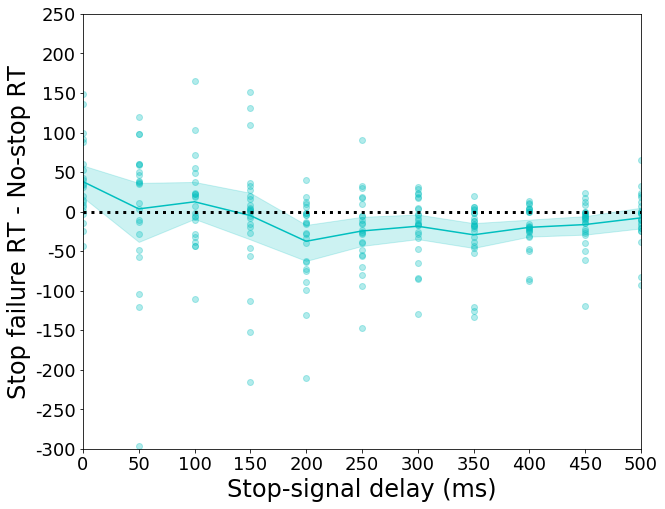

In [11]:
# Pivot & Plot
pivot_df = va_df.pivot_table(values='mean_violation', index=['SSD'],
                        columns=['ID'])


fig = plt.figure(figsize=(10,8))
plt.plot(pivot_df, linewidth=0, color='c', marker='o', alpha=.3, ) #plot individuals
ax = sns.lineplot(x='SSD', y="mean_violation", data=va_df, color='c')
ax.axis([0,500,-300,250])
ax.plot([0,pivot_df.index.max()],[0,0],color='k',linestyle=':',linewidth=3)

xticks=np.arange(0,pivot_df.index.max()+50,50)
xticks = [int(i) for i in xticks]
if len(xticks)> 16:
    xticks = [i for i in xticks if i%100==0]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize=18) 
yticks=np.arange(-300,250+50,50)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks,fontsize=18)

ax.set_xlabel('Stop-signal delay (ms)',fontsize=24)
_ = ax.set_ylabel('Stop failure RT - No-stop RT',fontsize=24) 
plt.show()
plt.close()